In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn')

## Load Datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_boston = pd.read_csv('/content/drive/MyDrive/Celerates/Python/Data Preprocessing in Python/boston_housing.csv')
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df_boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

<Axes: >

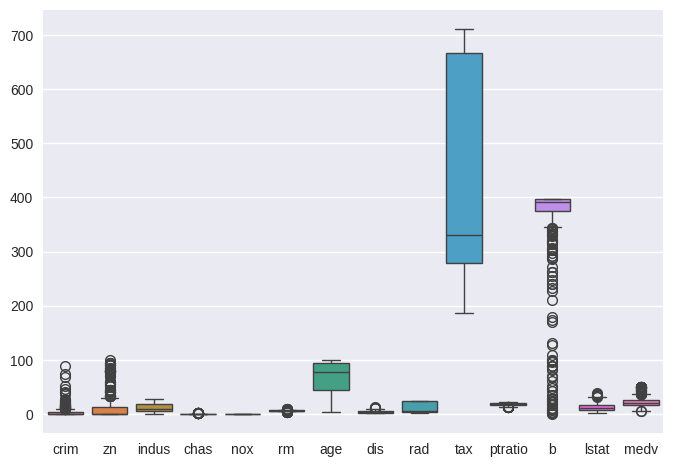

In [6]:
sns.boxplot(data=df_boston)

#### Removing Outliers

---

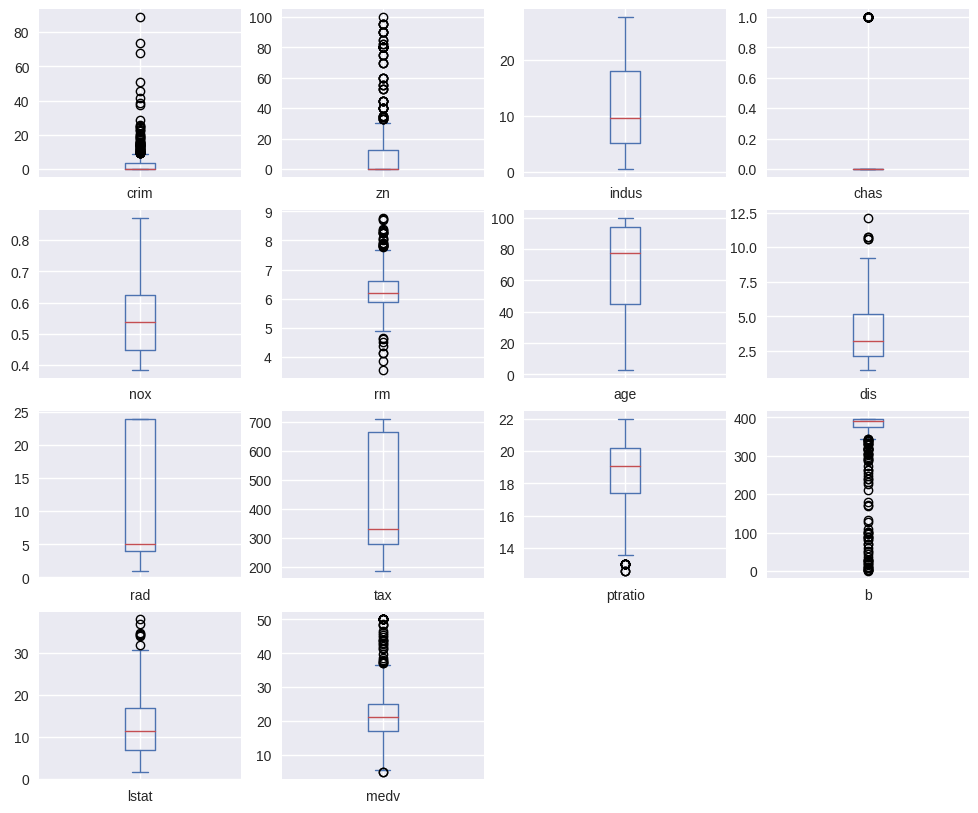

In [7]:
df_boston.plot(kind='box', subplots = True, layout = (4,4), figsize = (12,10))
plt.show()

##### IQR Method

In [8]:
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)
IQR = Q3-Q1
print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [9]:
df_boston_clear_iqr = df_boston[~((df_boston < (Q1-1.5*IQR)) | (df_boston > (Q3+1.5*IQR))).any(axis=1)]

In [10]:
df_boston_clear_iqr.shape[0]

268

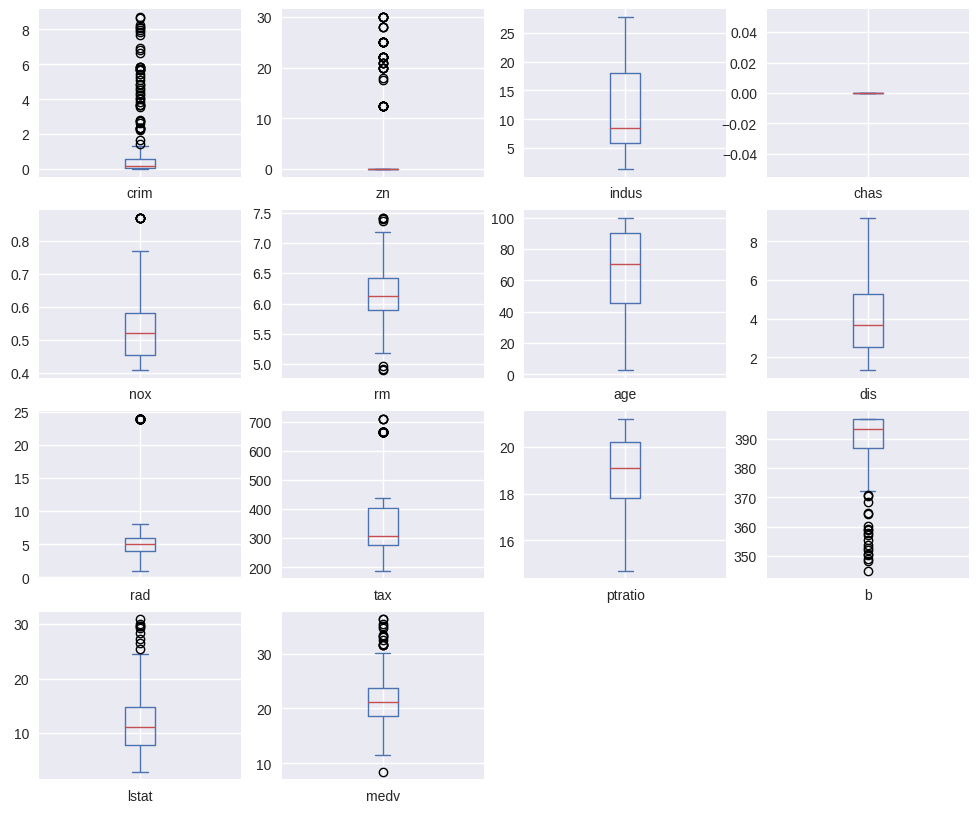

In [11]:
df_boston_clear_iqr.plot(kind='box', subplots = True, layout = (4,4), figsize = (12,10))
plt.show()

##### Z-score Method

In [12]:
def threshold(z,d):
    for i in np.arange(-4,4.1,0.1):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [13]:
from scipy.stats import zscore
z=zscore(df_boston[df_boston.columns])
threshold(z,df_boston[df_boston.columns])

With threshold -4.0 data loss is 100.0%
With threshold -3.9 data loss is 100.0%
With threshold -3.8 data loss is 100.0%
With threshold -3.7 data loss is 100.0%
With threshold -3.6 data loss is 100.0%
With threshold -3.5 data loss is 100.0%
With threshold -3.4 data loss is 100.0%
With threshold -3.3 data loss is 100.0%
With threshold -3.2 data loss is 100.0%
With threshold -3.1 data loss is 100.0%
With threshold -3.0 data loss is 100.0%
With threshold -2.9 data loss is 100.0%
With threshold -2.8 data loss is 100.0%
With threshold -2.7 data loss is 100.0%
With threshold -2.6 data loss is 100.0%
With threshold -2.5 data loss is 100.0%
With threshold -2.4 data loss is 100.0%
With threshold -2.3 data loss is 100.0%
With threshold -2.2 data loss is 100.0%
With threshold -2.1 data loss is 100.0%
With threshold -2.0 data loss is 100.0%
With threshold -1.9 data loss is 100.0%
With threshold -1.8 data loss is 100.0%
With threshold -1.7 data loss is 100.0%
With threshold -1.6 data loss is 100.0%


In [14]:
df_boston_clear=df_boston[(z<3.7).all(axis=1)]

In [15]:
df_boston_clear.shape[0]

496

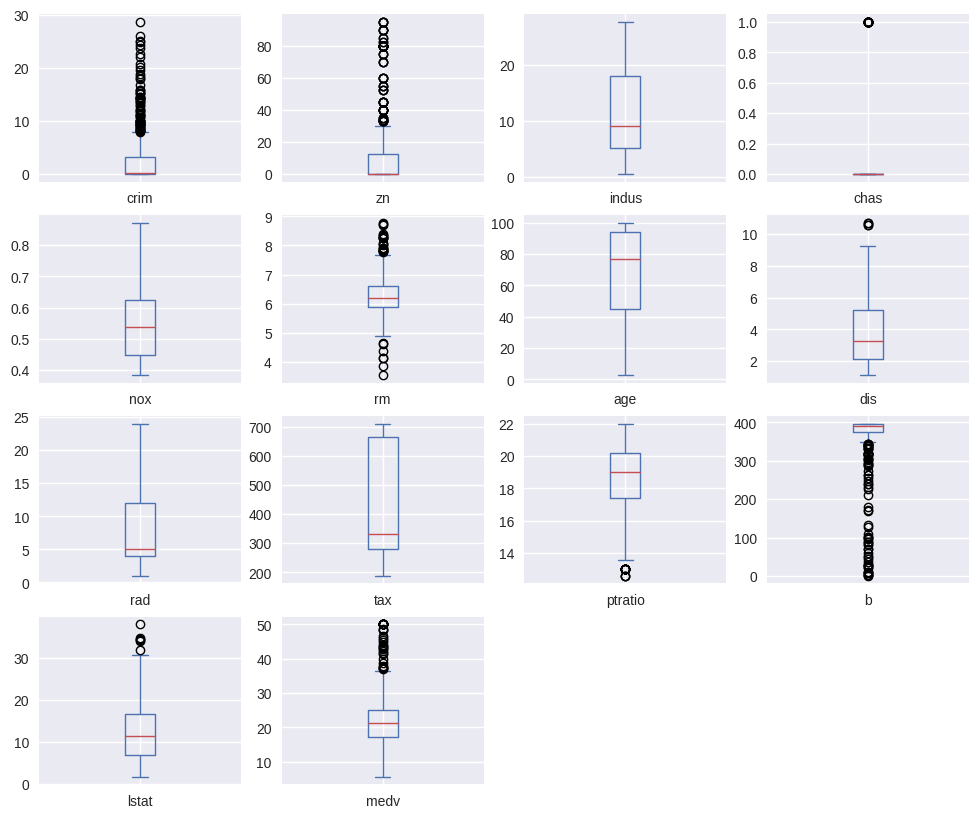

In [16]:
df_boston_clear.plot(kind='box', subplots = True, layout = (4,4), figsize = (12,10))
plt.show()

### Feature Engineering

In [17]:
df_boston['rm_lstat_interaction'] = df_boston['rm'] * df_boston['lstat']

In [18]:
interaction_col = df_boston.pop('rm_lstat_interaction')


df_boston.insert(df_boston.columns.get_loc('medv'), 'rm_lstat_interaction', interaction_col)

In [19]:
df_boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rm_lstat_interaction,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,32.74350,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,58.68794,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,28.95555,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,20.57412,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,38.09351,36.2


#### Feature Selection

In [20]:
df_boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rm_lstat_interaction,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.450529,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.419774,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.606946,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,-0.052988,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.603520,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.492349,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.627428,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.509215,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.514001,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.560237,-0.468536


<Axes: >

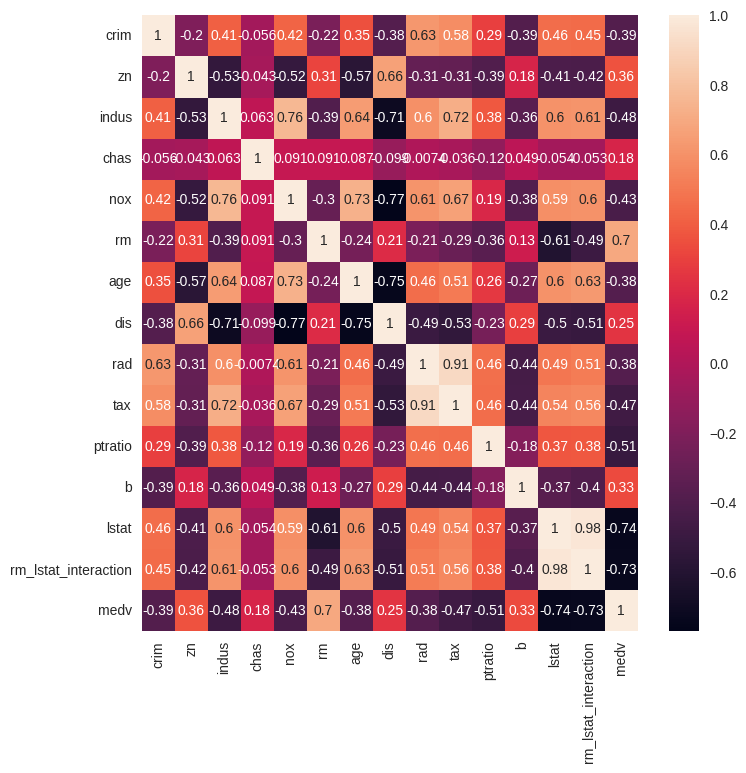

In [21]:
fig = plt.subplots(figsize=(8,8))
sns.heatmap(df_boston.corr(), annot=True)

In [22]:
cor_target = abs(df_boston.corr()['medv'])

relevant_features = cor_target[cor_target>0.5]
relevant_features

rm                      0.695360
ptratio                 0.507787
lstat                   0.737663
rm_lstat_interaction    0.729524
medv                    1.000000
Name: medv, dtype: float64

#### Train Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
X = df_boston[['rm', 'lstat','ptratio']]
y = df_boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 27.114957415580577
R-squared Score: 0.6302528487272827


In [33]:
X = df_boston[['rm_lstat_interaction','ptratio']]
y = df_boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 26.533266925799843
R-squared Score: 0.6381849431142455
